<a href="https://colab.research.google.com/github/ltbatista/machine-learning/blob/master/KNN_Fruits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Neste trabalho, iremos usar uma base de dados do Prof. Dr. Iain Murray, da Universidade de Edinburgh, a qual o professor registrou massa, tamanho, e outras características de diferentes frutas para criar um algoritmo de classificação



Montando o drive para buscar o arquivo de dataset do Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Importando as bibliotecas e lendo o arquivo do Dataset

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('/content/drive/My Drive/data/fruit_data_with_colors/fruit_data_with_colors.txt')


Entendendo o arquivo

In [4]:
print(fruits.head())

   fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79


In [7]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


Sabemos também, que a coluna color_score vai de 0 a 1 começando no roxo indo até o vermelho.

In [34]:
fruits.head(15)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [18]:
fruits.shape

(59, 7)

Vamos separar nosso dataset em Treino e Teste

In [0]:
X = fruits[['mass','width','height','color_score']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Abaixo, nós vamos criar uma visualização para validar os dados que serão analisados

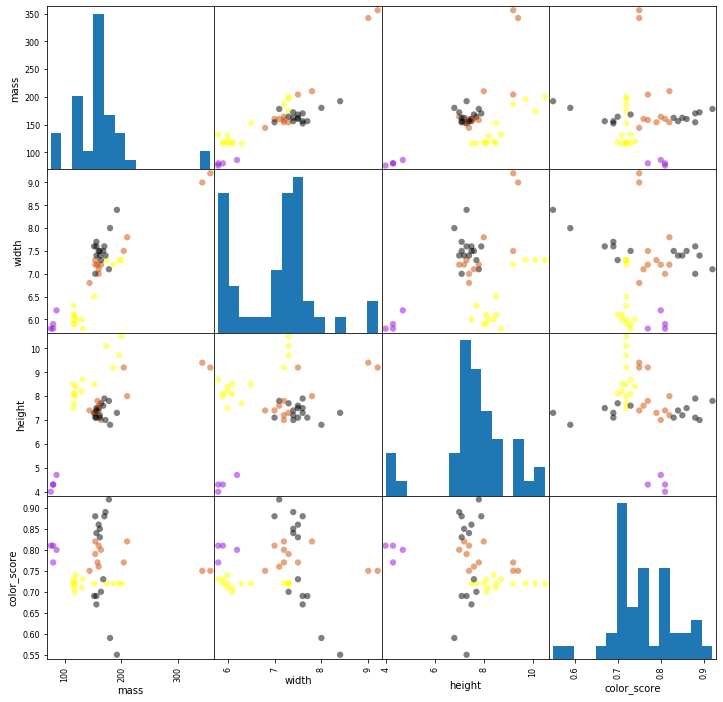

In [31]:
from pandas.plotting import scatter_matrix
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15},
                            figsize=(12,12), cmap=cmap)

Abaixo vamos criar um scatterplot tridimensional para a visualização dos dados

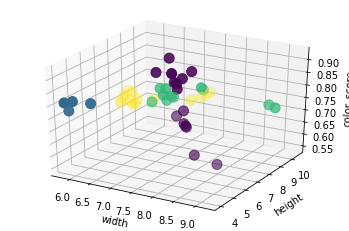

In [32]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [33]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

Criando o objeto de classificação

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

Treinando o classificador (estimando o fit) usando o dado de treino

In [36]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Estimando a precisão do classificador usando o conjunto de teste

In [37]:
knn.score(X_test, y_test)

0.5333333333333333

Usando o modelo treinado do classificador KNN para classificar novos objetos 

In [42]:
fruit_prediction = knn.predict([[20, 4.3, 5.5, 0.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [43]:
fruit_prediction = knn.predict([[100, 6.3, 8.5, 0.7]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

Quão sensitivo é a precisão do classificador KNN de acordo com a escolha do parâmetro K?

([<matplotlib.axis.XTick at 0x7f7af9a0e978>,
 <a list of 5 Text xticklabel objects>)

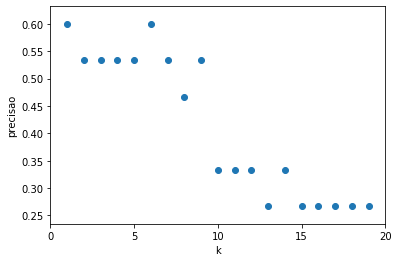

In [44]:
k_range = range(1,20)
scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('precisao')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])